# Data Science

Here we will do some data analysis on Movies dataset. <br>
This was the final task from ( Introduction to Data Science ) course: https://www.rwaq.org/courses/sea_python_level1/sections



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [100]:
# Setting the the font size and background of images.

sns.set(context='paper', style='dark', font='sans-serif', font_scale=1.52)


In [3]:
file = pd.read_excel("movie_metadata.xlsx")

In [4]:
file.shape

(3834, 19)

In [83]:
file.head()

,is_colored,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,actor_1_name,gross,main_genre,movie_title,cast_total_facebook_likes,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,movie_imdb_link
0,Color,James Cameron,723,178,0,1000,CCH Pounder,760505847,Action,Avatar,4834,English,USA,PG-13,237000000,2009,7.9,33000,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Color,Gore Verbinski,302,169,563,40000,Johnny Depp,309404152,Action,Pirates of the Caribbean: At World's End,48350,English,USA,PG-13,300000000,2007,7.1,0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Color,Sam Mendes,602,148,0,11000,Christoph Waltz,200074175,Action,Spectre,11700,English,UK,PG-13,245000000,2015,6.8,85000,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,Color,Christopher Nolan,813,164,22000,27000,Tom Hardy,448130642,Action,The Dark Knight Rises,106759,English,USA,PG-13,250000000,2012,8.5,164000,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Color,Andrew Stanton,462,132,475,640,Daryl Sabara,73058679,Action,John Carter,1873,English,USA,PG-13,263700000,2012,6.6,24000,http://www.imdb.com/title/tt0401729/?ref_=fn_t...


# Exploratory data analysis (EDA)

We are going to see the relation between all columns with imbd score column, In order to figure out what are the most important factors for the movie to get a high imdb score.

### Analyzing the statistics of Movies with hight and low score
* High Movie imdb score (> 6)
* Low Movie imdb score (< 7)

In [90]:
file[file.imdb_score > 6].describe().iloc[1,:]

num_critic_for_reviews       1.864769e+02
duration                     1.140380e+02
director_facebook_likes      1.035760e+03
actor_1_facebook_likes       8.335322e+03
gross                        5.854728e+07
cast_total_facebook_likes    1.233595e+04
budget                       4.889081e+07
title_year                   2.002558e+03
imdb_score                   7.005904e+00
movie_facebook_likes         1.167635e+04
Name: mean, dtype: float64

In [91]:
file[file.imdb_score < 7].describe().iloc[1,:]

num_critic_for_reviews       1.373735e+02
duration                     1.053498e+02
director_facebook_likes      4.399458e+02
actor_1_facebook_likes       6.977326e+03
gross                        4.343774e+07
cast_total_facebook_likes    1.044015e+04
budget                       4.023278e+07
title_year                   2.003898e+03
imdb_score                   5.912134e+00
movie_facebook_likes         5.201296e+03
Name: mean, dtype: float64

### IMDB Score vs Duration

Text(0.5,1,'IMDB Score by Duration')

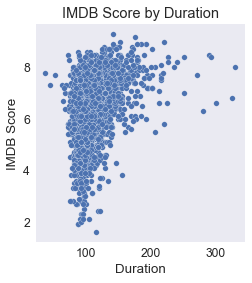

In [118]:
sns.pairplot(file ,y_vars=['imdb_score'],x_vars=['duration'], size=4).set(xlabel='Duration', ylabel='IMDB Score')
plt.title("IMDB Score by Duration")

Text(0.5,1,'IMDB Score > 5 Distribution')

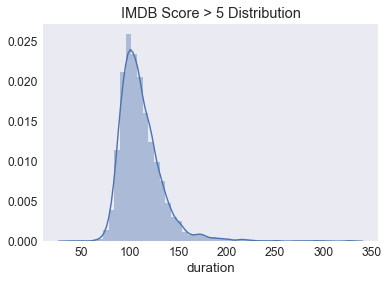

In [119]:
sns.distplot(file[file.imdb_score > 5].duration ).set(xlabel='Duration', ylabel='Frequency')
plt.title("IMDB Score > 5 Distribution")

Text(0.5,1,'IMDB Score < 6 Distribution')

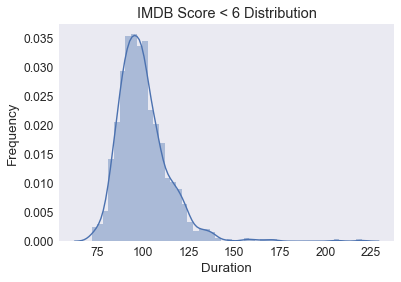

In [120]:
sns.distplot(file[file.imdb_score < 6].duration ).set(xlabel='Duration', ylabel='Frequency')
plt.title("IMDB Score < 6 Distribution")

### IMDB Score vs Reviews number

Text(0.5,1,'IMDB Score by Reviews number')

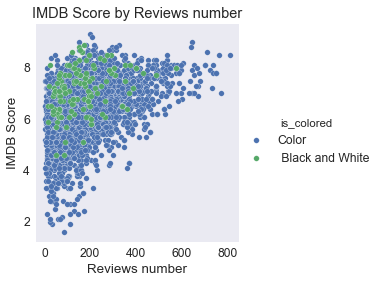

In [160]:
sns.pairplot(file ,y_vars=['imdb_score'],x_vars=['num_critic_for_reviews'], size=4, hue='is_colored').set(xlabel='Reviews number', ylabel='IMDB Score')
plt.title("IMDB Score by Reviews number")

#### Black and white vs Colored Movies.

[Text(0,0.5,'IMDB Score'), Text(0.5,0,'Is colored')]

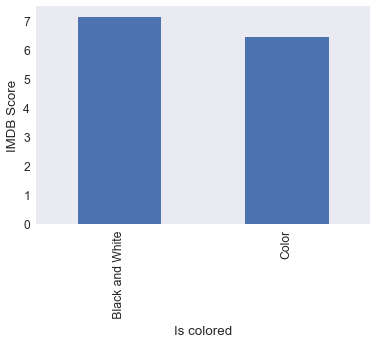

In [162]:
file.groupby('is_colored').imdb_score.mean().plot(kind='bar').set(xlabel='Is colored' , ylabel='IMDB Score')

### IMDB Score vs Facebook Likes on pag director, actor 1, cast and movie.


Text(0.5,0.98,'IMDB Score by Facebook Likes')

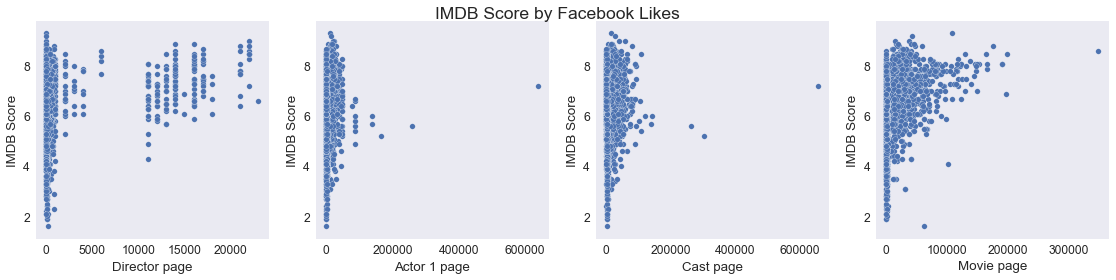

In [135]:
ax = sns.pairplot(file,y_vars=['imdb_score'] ,x_vars=['director_facebook_likes','actor_1_facebook_likes','cast_total_facebook_likes','movie_facebook_likes'],size=4)
ax.set( ylabel='IMDB Score')
ax.axes[0,0].set_xlabel('Director page')
ax.axes[0,1].set_xlabel('Actor 1 page')
ax.axes[0,2].set_xlabel('Cast page')
ax.axes[0,3].set_xlabel('Movie page')
ax.fig.suptitle( "IMDB Score by Facebook Likes")

* The Director facebook likes affect on the movie score.
* The Actor 1 facebook likes does not affect on the movie score. So, the actor withe littel facebook likes could get hight movie score.
* The cast total facebook likes affect on the movie score.

## IMDB Score vs Gross and Budget.

Text(0.5,0.98,'IMDB Score by Gross and Budget')

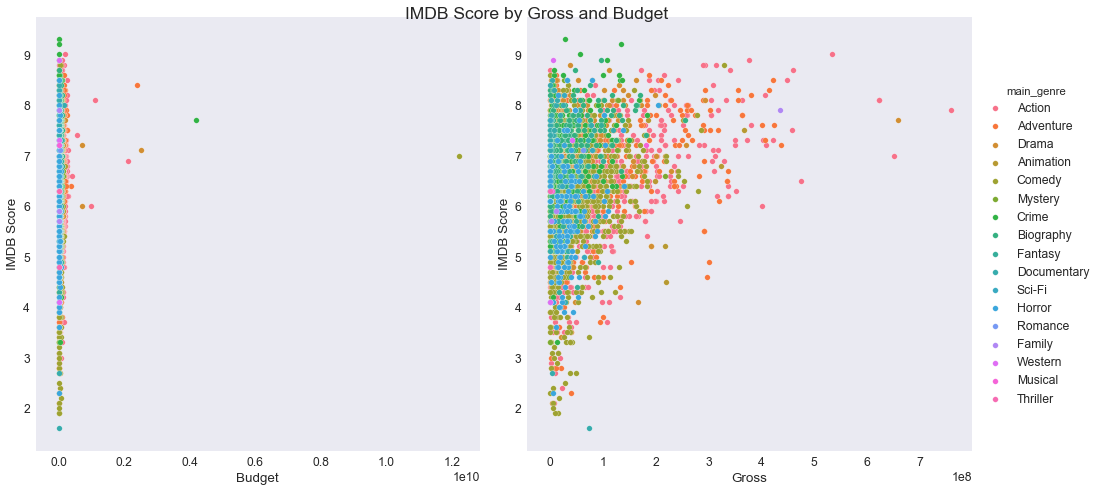

In [139]:
ax=sns.pairplot(file ,x_vars=['budget','gross'],y_vars='imdb_score' , hue='main_genre',size=7 )
ax.set( ylabel='IMDB Score')
ax.axes[0,0].set_xlabel('Budget')
ax.axes[0,1].set_xlabel('Gross')
ax.fig.suptitle( "IMDB Score by Gross and Budget")

### IMDB Score vs Gross.

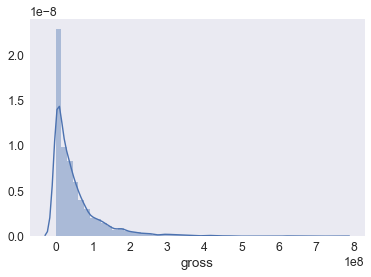

In [140]:
sns.distplot(file[file.imdb_score>5].gross)

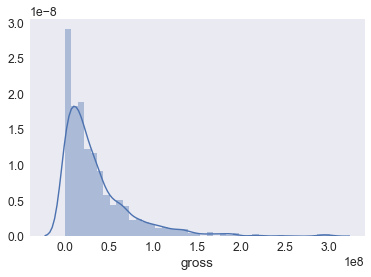

In [141]:
sns.distplot(file[file.imdb_score <6].gross)

* Gross of success movies between [0.2,3] 
* Gross of unsuccess movies between [0.2,1.5]

### IMDB Score vs Main Genre.

Text(0.5,1,'Scores of all main geners')

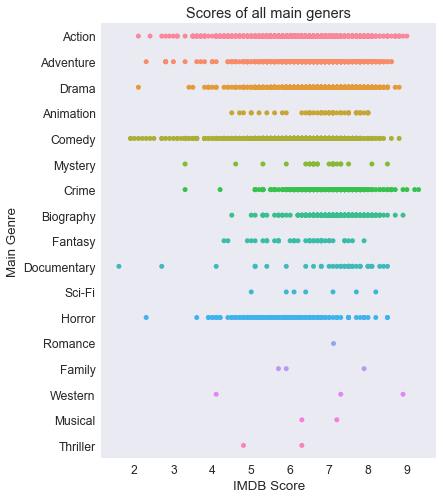

In [164]:
plt.subplots(figsize=(6,8))
ax = sns.stripplot(x='imdb_score' ,y='main_genre' ,data=file )
ax.set( xlabel='IMDB Score', ylabel='Main Genre' )
ax.set_title( "Scores of all main geners")

Text(0.5,1,'Scores of the successful main gener')

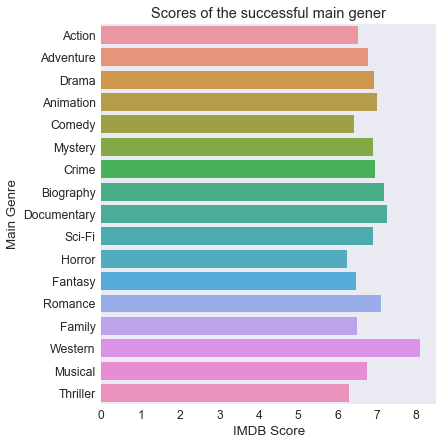

In [154]:
plt.subplots(figsize=(6,7))
ax= sns.barplot(x='imdb_score' ,y='main_genre' , data=file[file.imdb_score>5], ci=None)
ax.set( xlabel='IMDB Score', ylabel='Main Genre' )
ax.set_title( "Scores of the successful main gener")

### IMDB Score vs Language.

Text(0.5,1,'Languages by IMDB Score')

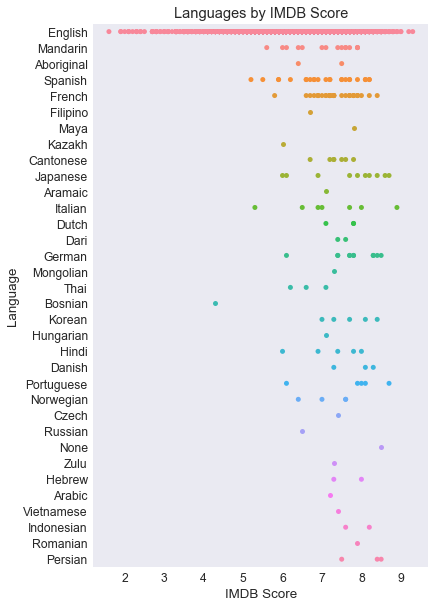

In [155]:
plt.subplots(figsize=(6,10))
ax= sns.stripplot(x='imdb_score' ,y='language' ,data=file )
ax.set( ylabel='Language', xlabel='IMDB Score' )
ax.set_title( "Languages by IMDB Score")

Text(0.5,1,'Scores of the successful movies language')

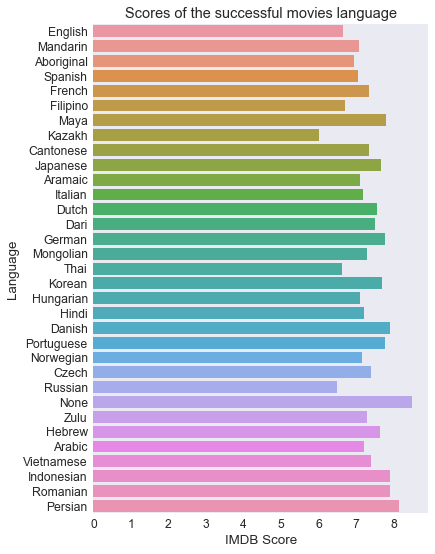

In [158]:
plt.subplots(figsize=(6,9))
ax= sns.barplot(x='imdb_score' ,y='language' , data=file[file.imdb_score>5], ci=None)
ax.set( xlabel='IMDB Score', ylabel='Language' )
ax.set_title( "Scores of the successful movies language")

### Distribution of successful movies in years

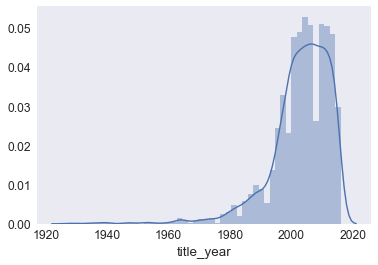

In [165]:
sns.distplot(file[file.imdb_score>5].title_year )

### Distribution of unsuccessful movies in years

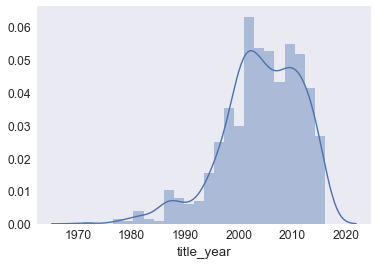

In [166]:
sns.distplot(file[file.imdb_score <6 ].title_year )